In [3]:
################### standard ###################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

################### allow import from src ###################
import sys, os
sys.path.append(os.path.abspath(".."))

################### pipeline step ###################
import src.data_prep as data
import src.models.poly_reg as poly
import src.config.feature_def as feature_def
import src.models.utils as utils

In [4]:
monthly = data.prepare_monthly_dataset("../data/Major_Crime_Indicators_Open_Data.csv")

################ define features ################
feature_cols = feature_def.FEATURE_NSI_3M
target_col = feature_def.TARGET_COL

In [5]:
################### Train Polynomial Regression ###################

model, transformer, y_test, y_pred, metrics = poly.train_poly_model(
    monthly,
    feature_cols,
    target_col,
    scale=True,
    degree=2,
    interaction_only=False
)

print("Polynomial Regression (degree=2) Metrics:")
metrics

Polynomial Regression (degree=2) Metrics:


{'R2': 0.8127342298834325,
 'MAE': 0.04215753384160849,
 'MSE': 0.0031354592794864866,
 'RMSE': 0.055995171930144895}

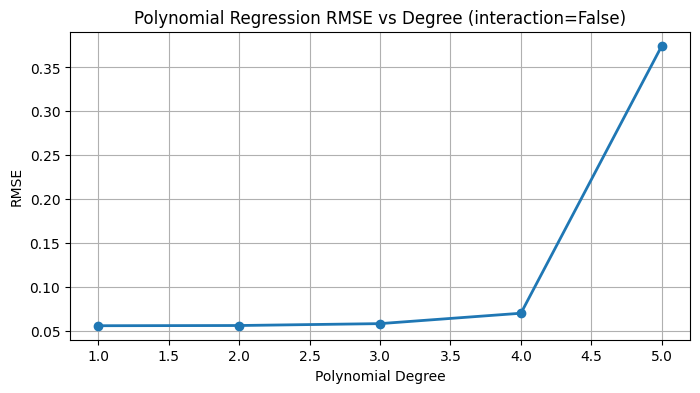

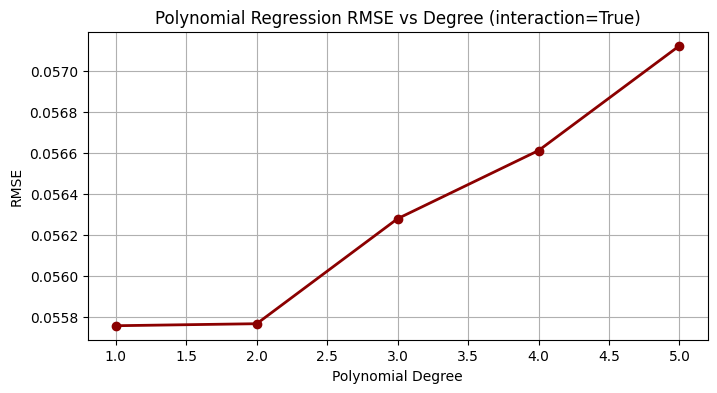

In [6]:
results, best = poly.poly_hparam_search(monthly, feature_cols, "NSI")
poly.plot_poly_rmse_lines(results)

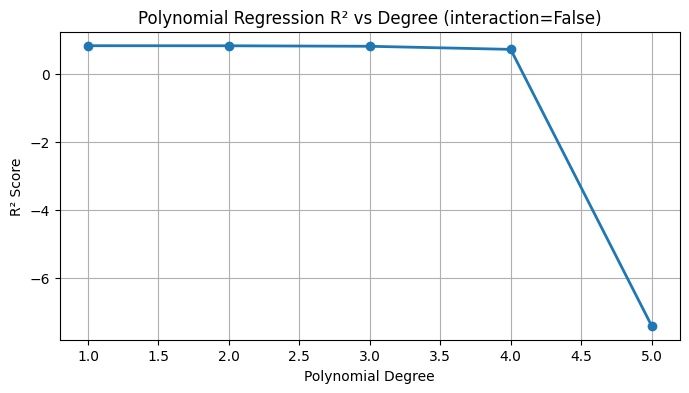

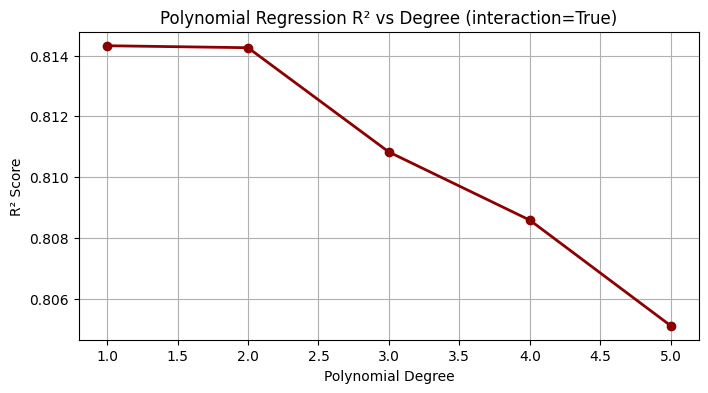

In [7]:
poly.plot_poly_r2_lines(results)

In [8]:
best

{'degree': 1,
 'interaction': False,
 'R2': 0.8143254415627668,
 'RMSE': 0.05575676676755006}

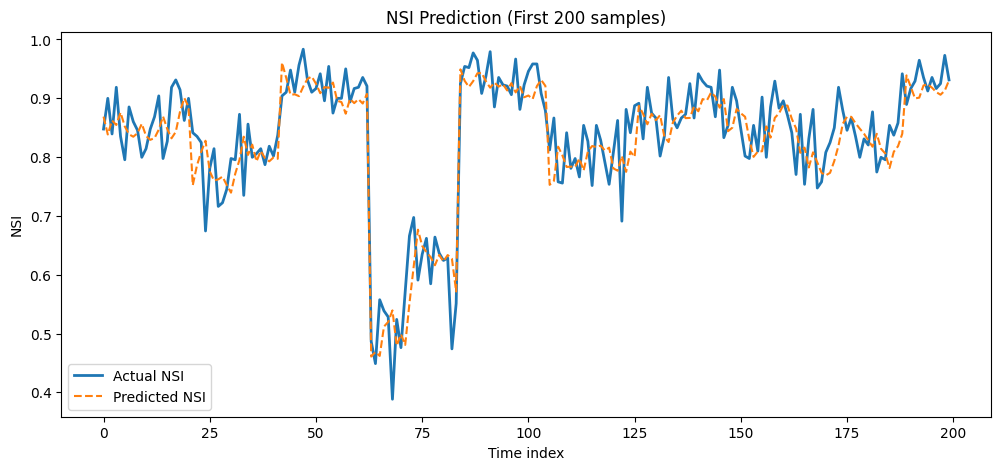

In [9]:
utils.plot_predictions(y_test, y_pred)